# RNN
![image-7.png](attachment:image-7.png)
- 이런 경우는 timesteps가 30
- 10000개 단어이므로 차원은 1만 차원
#### 임베딩( 차원이 큰 경우 고차원을 저차원으로 word2vec이랑 비슷함 )
- 아래의 빨간 직사각형이 임베딩
![image-8.png](attachment:image-8.png)

#### 데이터 전처리
1. 제목 열 추출
2. 공백 분리(nltk, keras), 형태소 분리(konlpy)
3. 불용어 제거, 조사,,,,,정규 표현식
4. 유일한 단어 -> 길이(코퍼스 크기)
5. 각 단어 숫자 부여
6. 가장 긴 문장 길이 조사 (ex. 30개)
7. 모든 문장 길이를 동일하게(pre)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding # 차원축소
from tensorflow.keras.utils import to_categorical # 원핫 인코딩
from tensorflow.keras.preprocessing import sequence # 패딩
from tensorflow.keras.datasets import reuters       # 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)
#num_words : 로이터 뉴스 8982에 대해 뉴스 기사에서 가장 많이 등장하는 1000개의 단어들로 구성

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
 X_train.shape #뉴스기사 : 8982

(8982,)

In [ ]:
 X_train[0] # 첫번째 뉴스기사, 숫자로 인코딩 되어있음( 각각의 뉴스가 리스트로 저장됨)
y_train # 뉴스기사 카테고리, 46개의 카테고리고 되어있음

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [ ]:
np.max(y_train)

45

In [ ]:
np.min(y_train)

0

In [ ]:
len(X_train[0]) #뉴스 기사의 길이가 모두 다름
len(X_train[1])

56

In [ ]:
# 모든 문장의 최대 길이를 100으로 정함
# y_train 원핫 인코딩을 해줘야함(46차원)

In [ ]:
X_train=sequence.pad_sequences(X_train,maxlen=100)
X_test=sequence.pad_sequences(X_test,maxlen=100)

In [ ]:
# 이 셀은 꼭 한번만 실행하기
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
model=Sequential()

In [ ]:
#1000을 100차원으로, 성능이 달라질수도 있음
model.add(Embedding(1000,100))

In [ ]:
model.add(LSTM(100)) #출력을 100차원으로

In [ ]:
model.add(Dense(46,activation="softmax"))

In [ ]:
# 훈련위한 옵티마이저, 로스 지정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 학습 조기 중단
# 'val_loss' 검증데이터가 5번 이상 성능이 좋아지지 않으면 강제로 중단
# train, test말고  val 데이터가 없으므로 fit에서 직접 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

Epoch 1/200
450/450 [==============================] - 18s 36ms/step - loss: 2.1796 - accuracy: 0.4452 - val_loss: 1.8728 - val_accuracy: 0.4849
Epoch 2/200
450/450 [==============================] - 19s 43ms/step - loss: 1.7264 - accuracy: 0.5542 - val_loss: 1.6640 - val_accuracy: 0.5815
Epoch 3/200
450/450 [==============================] - 19s 42ms/step - loss: 1.5839 - accuracy: 0.5930 - val_loss: 1.5653 - val_accuracy: 0.6073
Epoch 4/200
450/450 [==============================] - 20s 44ms/step - loss: 1.4320 - accuracy: 0.6350 - val_loss: 1.4559 - val_accuracy: 0.6300
Epoch 5/200
450/450 [==============================] - 17s 37ms/step - loss: 1.2627 - accuracy: 0.6799 - val_loss: 1.3327 - val_accuracy: 0.6554
Epoch 6/200
450/450 [==============================] - 20s 44ms/step - loss: 1.1493 - accuracy: 0.7094 - val_loss: 1.2365 - val_accuracy: 0.6821
Epoch 7/200
450/450 [==============================] - 20s 44ms/step - loss: 1.0477 - accuracy: 0.7381 - val_loss: 1.2159 - val_ac

In [ ]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 1s 19ms/step - loss: 1.2145 - accuracy: 0.7235

 Test Accuracy: 0.7235


In [ ]:
# x, y 데이터에 대해 20%를 검증(validation)용으로 사용
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_split=0.2, callbacks=[early_stopping_callback])

Epoch 1/200
360/360 [==============================] - 10s 29ms/step - loss: 0.4971 - accuracy: 0.8782 - val_loss: 0.5146 - val_accuracy: 0.8670
Epoch 2/200
360/360 [==============================] - 15s 42ms/step - loss: 0.4508 - accuracy: 0.8850 - val_loss: 0.5310 - val_accuracy: 0.8531
Epoch 3/200
360/360 [==============================] - 12s 33ms/step - loss: 0.4153 - accuracy: 0.8967 - val_loss: 0.5735 - val_accuracy: 0.8503
Epoch 4/200
360/360 [==============================] - 13s 37ms/step - loss: 0.3815 - accuracy: 0.9066 - val_loss: 0.6122 - val_accuracy: 0.8403
Epoch 5/200
360/360 [==============================] - 15s 41ms/step - loss: 0.3409 - accuracy: 0.9134 - val_loss: 0.6396 - val_accuracy: 0.8342
Epoch 6/200
360/360 [==============================] - 14s 38ms/step - loss: 0.3201 - accuracy: 0.9173 - val_loss: 0.6877 - val_accuracy: 0.8292


In [ ]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 1s 19ms/step - loss: 1.4487 - accuracy: 0.7102

 Test Accuracy: 0.7102


In [ ]:
import numpy as np  # 선형대수
import pandas as pd # 데이터 분석, 전처리
import seaborn as sns # 시각화
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("tsla.us.txt")

In [ ]:
data

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-06-28,17.00,17.00,17.00,17.00,0,0
1,2010-06-29,19.00,25.00,17.54,23.89,18783276,0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394,0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863,0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807,0
...,...,...,...,...,...,...,...
1853,2017-11-06,307.00,307.50,299.01,302.78,6482486,0
1854,2017-11-07,301.02,306.50,300.03,306.05,5286320,0
1855,2017-11-08,305.50,306.89,301.30,304.31,4725510,0
1856,2017-11-09,302.50,304.46,296.30,302.99,5440335,0


In [ ]:
data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-06-28,17.00,17.00,17.00,17.00,0,0
1,2010-06-29,19.00,25.00,17.54,23.89,18783276,0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394,0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863,0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807,0


In [ ]:
data.shape

(1858, 7)

In [ ]:
data.describe()

,Open,High,Low,Close,Volume,OpenInt
count,1858.000000,1858.000000,1858.000000,1858.000000,1.858000e+03,1858.0
mean,150.389741,152.898737,147.688064,150.355047,4.416508e+06,0.0
std,107.071675,108.490099,105.481665,107.023737,4.244294e+06,0.0
min,16.140000,16.630000,8.030000,15.800000,0.000000e+00,0.0
25%,31.002500,31.732500,30.285000,31.112500,1.283324e+06,0.0
50%,184.440000,188.660000,181.450000,184.850000,3.421026e+06,0.0
75%,231.477500,235.375000,227.772500,230.920000,5.917672e+06,0.0
max,386.690000,389.610000,379.345000,385.000000,3.714989e+07,0.0


In [ ]:
data.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [ ]:
training_size = int(len(data)*0.80)
data_len = len(data)

In [ ]:
training_size

1486

In [ ]:
data_len

1858

In [ ]:
train, test = data[0:training_size],data[training_size:data_len] # 80%, 20%

In [ ]:
print("Training Size --> ", training_size)
print("total length of data --> ", data_len)
print("Train length --> ", len(train))
print("Test length --> ", len(test))

Training Size -->  1486
total length of data -->  1858
Train length -->  1486
Test length -->  372


In [ ]:
# minmaxscaler
train = train.loc[:, ["Open"]].values

In [ ]:
train

array([[ 17.  ],
       [ 19.  ],
       [ 25.79],
       ...,
       [213.62],
       [216.99],
       [219.87]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) # 0,1 말고로 0,2 이런식으로 다른 값 가능
train_scaled = scaler.fit_transform(train)

In [ ]:
train_scaled # 모든값이 0과 1사이에

array([[0.00316724],
       [0.01053291],
       [0.03553935],
       ...,
       [0.72728612],
       [0.73969727],
       [0.75030383]])

In [ ]:
end_len = len(train_scaled)
end_len

1486

In [ ]:
X_train = []
y_train = []
timesteps = 40

In [ ]:
for i in range(timesteps, end_len):
    X_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
train_scaled[0:40,0] #40일간의 시가
train_scaled[40,0] # 40+1일째의 시가

0.01145361470187456

In [ ]:
train_scaled[40,0]

0.01145361470187456

In [ ]:
X_train.shape

(1446, 40)

In [ ]:
y_train.shape

In [ ]:
# rnn : 입력 데이터의 구조를 3차원으로 해야 함

In [ ]:
X_train
X_train=np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
# (1446, 40, 1)
# ( 데이터의 개수, time step, dimension(데이터 차원))

In [ ]:
X_train.shape

(1446, 40, 1)

# 이 과정이 끝났으면 본격적으로 모델을 만들기

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [ ]:
regressor = Sequential()

In [ ]:
regressor.add(SimpleRNN(units=50, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units=50, activation='tanh'))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

![image.png](attachment:image.png)

In [ ]:
regressor.compile(optimizer= "adam", loss = "mean_squared_error")

In [ ]:
epochs = 100
batch_size = 20

In [ ]:
regressor.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)

Epoch 1/100
73/73 [==============================] - 3s 14ms/step - loss: 0.3531
Epoch 2/100
73/73 [==============================] - 1s 13ms/step - loss: 0.1814
Epoch 3/100
73/73 [==============================] - 1s 13ms/step - loss: 0.1237
Epoch 4/100
73/73 [==============================] - 1s 13ms/step - loss: 0.0769
Epoch 5/100
73/73 [==============================] - 1s 13ms/step - loss: 0.0532
Epoch 6/100
73/73 [==============================] - 1s 13ms/step - loss: 0.0431
Epoch 7/100
73/73 [==============================] - 1s 13ms/step - loss: 0.0335
Epoch 8/100
73/73 [==============================] - 1s 13ms/step - loss: 0.0245
Epoch 9/100
73/73 [==============================] - 1s 13ms/step - loss: 0.0239
Epoch 10/100
73/73 [==============================] - 1s 13ms/step - loss: 0.0194
Epoch 11/100
73/73 [==============================] - 1s 13ms/step - loss: 0.0183
Epoch 12/100
73/73 [==============================] - 1s 13ms/step - loss: 0.0164
Epoch 13/100
73/73 [=====

In [ ]:
test.head()

,Date,Open,High,Low,Close,Volume,OpenInt
1486,2016-05-24,216.60,218.74,215.18,217.91,2928659,0
1487,2016-05-25,217.91,221.36,216.51,219.58,2514028,0
1488,2016-05-26,220.50,225.26,219.05,225.12,3560997,0
1489,2016-05-27,224.99,225.93,220.75,223.04,3081734,0
1490,2016-05-31,223.04,224.75,221.50,223.23,2046828,0


In [ ]:
real_price = test.loc[:, ["Open"]].values

In [ ]:
dataset_total=pd.concat((data["Open"],test["Open"]),axis=0)
dataset_total

0        17.00
1        19.00
2        25.79
3        25.00
4        23.00
         ...  
1853    307.00
1854    301.02
1855    305.50
1856    302.50
1857    302.50
Name: Open, Length: 2230, dtype: float64

In [ ]:
dataset_total

0        17.00
1        19.00
2        25.79
3        25.00
4        23.00
         ...  
1853    307.00
1854    301.02
1855    305.50
1856    302.50
1857    302.50
Name: Open, Length: 2230, dtype: float64

In [ ]:
inputs=dataset_total[len(dataset_total)-len(test)-timesteps:].values.reshape(-1,1)
inputs.shape

(412, 1)

In [ ]:
inputs=scaler.transform(inputs)
inputs

array([[1.3409568 ],
       [1.34003609],
       [1.31425625],
       [1.32125364],
       [1.290281  ],
       [1.24115199],
       [1.2329761 ],
       [1.22918278],
       [1.19228078],
       [1.19957279],
       [1.20200346],
       [1.1776231 ],
       [1.23415461],
       [1.25164807],
       [1.24096785],
       [1.22826207],
       [1.21776599],
       [1.24387729],
       [1.24041542],
       [1.25525725],
       [1.24339852],
       [1.23290244],
       [1.25153758],
       [1.25002762],
       [1.23945789],
       [1.22910912],
       [1.18830332],
       [1.18056937],
       [1.14771848],
       [1.11814532],
       [1.11604611],
       [1.11991309],
       [1.16418075],
       [1.04588812],
       [1.04356793],
       [1.07118919],
       [1.04916584],
       [1.06566494],
       [1.05461643],
       [1.05461643],
       [0.73826097],
       [0.74308548],
       [0.75262402],
       [0.76915995],
       [0.76197842],
       [0.7562332 ],
       [0.74927264],
       [0.750

In [ ]:
print("Test length --->", len(test))

Test length ---> 372


In [ ]:
X_test=[]
for i in range(timesteps, 412):
     X_test.append(inputs[i-timesteps:i,0])

In [ ]:
X_test=np.array(X_test)

In [ ]:
print(X_test.shape)

(372, 40)


In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
pred=regressor.predict(X_test)

12/12 [==============================] - 0s 6ms/step


In [ ]:
pred
pred.shape

(372, 1)

In [ ]:
pred

array([[0.98278713],
       [0.8898301 ],
       [0.8127514 ],
       [0.8037567 ],
       [0.81530267],
       [0.81980973],
       [0.8098615 ],
       [0.8079609 ],
       [0.8009782 ],
       [0.7925337 ],
       [0.7915471 ],
       [0.8070414 ],
       [0.82114774],
       [0.8148594 ],
       [0.7970603 ],
       [0.7853357 ],
       [0.77563834],
       [0.7739686 ],
       [0.77253866],
       [0.77207005],
       [0.78205025],
       [0.7516399 ],
       [0.71591216],
       [0.6895162 ],
       [0.6839111 ],
       [0.7009016 ],
       [0.7141642 ],
       [0.7347106 ],
       [0.7396085 ],
       [0.7430659 ],
       [0.7423195 ],
       [0.74550575],
       [0.76129353],
       [0.7688844 ],
       [0.7790885 ],
       [0.7891543 ],
       [0.7931124 ],
       [0.79170066],
       [0.7850311 ],
       [0.79106   ],
       [0.8008954 ],
       [0.8051901 ],
       [0.8009162 ],
       [0.7966228 ],
       [0.80525523],
       [0.81360984],
       [0.8145764 ],
       [0.818

In [ ]:
pred=scaler.inverse_transform(pred)
pred

array([[282.9962 ],
       [257.75558],
       [236.8264 ],
       [234.38406],
       [237.51913],
       [238.74295],
       [236.0417 ],
       [235.52563],
       [233.62961],
       [231.33669],
       [231.0688 ],
       [235.27596],
       [239.10625],
       [237.39877],
       [232.5658 ],
       [229.38222],
       [226.74908],
       [226.2957 ],
       [225.90742],
       [225.78018],
       [228.49011],
       [220.23279],
       [210.53163],
       [203.36433],
       [201.84238],
       [206.45583],
       [210.057  ],
       [215.63597],
       [216.96591],
       [217.9047 ],
       [217.70203],
       [218.56718],
       [222.85403],
       [224.91519],
       [227.68591],
       [230.41907],
       [231.49382],
       [231.11049],
       [229.2995 ],
       [230.93652],
       [233.60713],
       [234.77327],
       [233.61278],
       [232.447  ],
       [234.79095],
       [237.05948],
       [237.32193],
       [238.40337],
       [240.91296],
       [240.56601],


In [ ]:
real_price.shape

(372, 1)

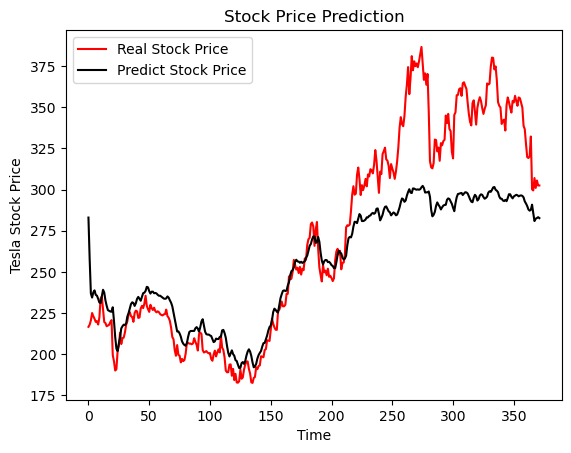

In [ ]:
plt.plot(real_price, color = "red", label = "Real Stock Price")
plt.plot(pred, color = "black", label = "Predict Stock Price")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Tesla Stock Price")
plt.legend()
plt.show()

In [ ]:
#lstm 변경
# 관심있는 회사에 대해 예측모델